In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##### We are extracting data from multiple Excel files, including dim_date, dim_hotels, dim_rooms, fact_aggregated_bookings, fact_bookings, and new_data_august.

In [9]:
df_booking = pd.read_csv("fact_bookings.csv")
df_booking.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [10]:
df_booking.shape

(134590, 12)

In [11]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [12]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [13]:
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

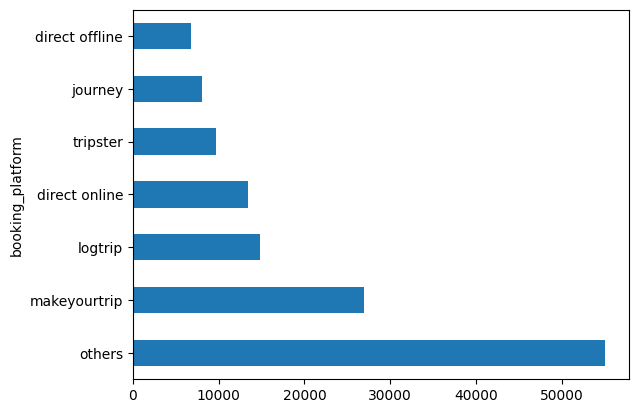

In [14]:
df_booking.booking_platform.value_counts().plot(kind = "barh")

##### high no of customers are doing booking from other platforms

In [15]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [16]:
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(6500, 28560000)

##### In the fact_bookings dataset, we have a total of 134,590 rows and 12 columns. The dataset contains information from multiple platforms through which rooms can be booked. As per the data, the minimum revenue generated is approximately 6,500, while the maximum revenue generated is approximately 28,560,000.

In [17]:
df_date = pd.read_csv("dim_date.csv")
df_hotel = pd.read_csv("dim_hotels.csv")
df_room  = pd.read_csv("dim_rooms.csv")
df_agg = pd.read_csv("fact_aggregated_bookings.csv")

In [18]:
df_hotel.shape

(25, 4)

In [19]:
df_hotel.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [20]:
df_hotel.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [21]:
df_hotel.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [22]:
df_hotel.property_name.value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64

##### Here, we are analyzing the hotel category count, the cities where they operate, and the count of their property names.

In [23]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [27]:
df_agg.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [28]:
result = df_agg.groupby('property_id')['successful_bookings'].sum().reset_index()
result.rename(columns={'successful_booking': 'total_successful_bookings'}, inplace=True)

In [29]:
result

,property_id,successful_bookings
0,16558,3153
1,16559,7338
2,16560,4693
3,16561,4418
4,16562,4820
5,16563,7211
6,17558,5053
7,17559,6142
8,17560,6013
9,17561,5183


##### From the dataset, we performed a group by operation on successful bookings using the property_id to calculate the count of successful bookings for each property.

In [30]:
df_agg[df_agg.successful_bookings > df_agg.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [31]:
df_agg[df_agg.capacity == df_agg.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


##### data cleaning

##### During the analysis, we identified an error where the number of successful bookings exceeded the hotel’s capacity. Since this represents incorrect data, we are removing these records entirely from the dataset.

In [32]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [33]:
df_booking[df_booking.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [34]:
df_booking  = df_booking[df_booking.no_guests>0]
df_booking.shape

(134578, 12)

##### After uploading the booking data, we observed that the no_guest column contains some negative values, which are invalid. Therefore, we are removing these records from the dataset.

In [35]:
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(6500, 28560000)

In [36]:
avg, std = df_booking.revenue_generated.mean(),df_booking.revenue_generated.std()
avg, std

(15378.036937686695, 93040.1549314641)

##### Here, we are calculated the average and standard deviation for the revenue generated, as the maximum revenue value of 28,560,000 appears to be unrealistic.

In [37]:
higher_limit = avg+3*std
higher_limit   

294498.50173207896

##### this is from statistics and is usually called the Three Sigma Rule or the 68-95-99.7 Rule.

In [58]:
df_booking[df_booking.revenue_generated> higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [38]:
df_booking = df_booking[df_booking.revenue_generated< higher_limit]
df_booking.shape

(134573, 12)

##### We are removing the data points where the revenue exceeds the higher limit calculated above, as these values are incorrect.

In [45]:
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [46]:
avg , std = df_booking.revenue_realized.mean(), df_booking.revenue_realized.std()

In [47]:
avg,std

(12695.983585117372, 6927.791692242814)

In [48]:
rev_re_li = avg + 3*std
rev_re_li

33479.358661845814

In [49]:
df_booking[df_booking.revenue_realized> rev_re_li]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [50]:
df_booking[df_booking.room_category =="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [51]:
23439.308444 + 3* 9048.599076

50585.105672000005

##### Similarly, we calculated the average and standard deviation for revenue_realized and applied the Three Sigma Rule. This resulted in 1,299 rows being flagged as outliers. Upon further investigation, we found that all these records belong to the RT4 room category, which represents highly expensive rooms. Therefore, we recalculated the standard deviation only for the RT4 room category. For RT4 rooms, any revenue_realized value above 50,585 would be considered an outlier. Since the maximum value observed is 45,200, we concluded that there are no outliers for this category.

In [52]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [53]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [75]:
df_agg.shape

(9200, 5)

In [78]:
df_agg.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [54]:
df_agg.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [55]:
df_agg[df_agg.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [58]:
df_agg.capacity.fillna(df_agg.capacity.median(), inplace = True)


In [60]:
df_agg.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


##### The null value of capacity has been successfully replaced with the median value.

### data transformation 

In [61]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


##### Here, we calculate the Occupancy Percentage (OCC%) as: successful_booking/ capacity


In [68]:
df_agg["occ%"] = ((df_agg.successful_bookings / df_agg.capacity) * 100).round(2).astype(float)


In [69]:
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ%
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


### Insights Generation

##### 1. What is an avg occ rate in each of the room categories?

In [70]:
df_agg.groupby("room_category")["occ%"].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ%, dtype: float64

<Axes: xlabel='room_category'>

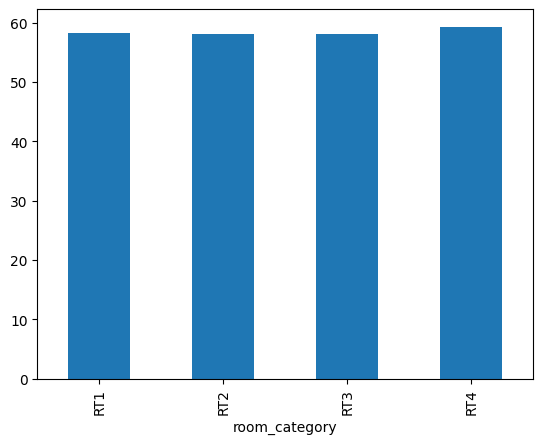

In [71]:
df_agg.groupby("room_category")["occ%"].mean().plot(kind = "bar")

In [77]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [78]:
df = pd.merge(df_agg,df_room , right_on = "room_id",left_on = "room_category")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ%,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [79]:
df.groupby("room_class")["occ%"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ%, dtype: float64

In [80]:
df.drop("room_id",axis =1 , inplace = True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ%,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


##### 2. Avg occupancy rate per city

In [110]:
df_hotel.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [84]:
df1 = pd.merge(df,df_hotel,on = 'property_id', how = "left")
df1.head()


,property_id,check_in_date,room_category,successful_bookings,capacity,occ%,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi


In [85]:
df1.groupby("city")["occ%"].mean()

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.943142
Name: occ%, dtype: float64

##### 3. When was the occupancy better? Weekday or weekend?

In [87]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [88]:
df2 = pd.merge(df1,df_date,left_on = "check_in_date", right_on = "date")
df2.drop("check_in_date", axis =1 , inplace = True)
df2.head(3)

,property_id,room_category,successful_bookings,capacity,occ%,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          6500 non-null   int64  
 1   room_category        6500 non-null   object 
 2   successful_bookings  6500 non-null   int64  
 3   capacity             6500 non-null   float64
 4   occ%                 6500 non-null   float64
 5   room_class           6500 non-null   object 
 6   property_name        6500 non-null   object 
 7   category             6500 non-null   object 
 8   city                 6500 non-null   object 
 9   date                 6500 non-null   object 
 10  mmm yy               6500 non-null   object 
 11  week no              6500 non-null   object 
 12  day_type             6500 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 660.3+ KB


In [90]:
df2.groupby("day_type")["occ%"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ%, dtype: float64

##### 5.In the month of June, we are calculating the occupancy rate for different cities

In [91]:
 df2['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [92]:
df_june22 = df2[df2['mmm yy']=='Jun 22']
df_june22.head()

,property_id,room_category,successful_bookings,capacity,occ%,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [93]:
df_june22.groupby("city")["occ%"].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ%, dtype: float64

In [94]:
df_aug = pd.read_csv("new_data_august.csv")
df_aug.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [95]:
df_aug.shape

(7, 13)

In [96]:
df2.shape

(6500, 13)

In [97]:
latest_df = pd.concat([df2,df_aug],ignore_index = True,axis = 0)

In [98]:
latest_df.tail()

,property_id,room_category,successful_bookings,capacity,occ%,room_class,property_name,category,city,date,mmm yy,week no,day_type,check_in_date
6502,19563,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,01-Aug-22
6503,19558,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,01-Aug-22
6504,19560,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,01-Aug-22
6505,17561,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,01-Aug-22
6506,17564,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,01-Aug-22


In [99]:
latest_df.shape

(6507, 14)

##### Here, we successfully merged the August data with the datasets for May, June, and July.

##### 6.Print revenue realized per city of Month May, june and July

In [107]:
df_hotel.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [108]:
df_rev = pd.merge(df_booking,df_hotel, on = "property_id")
df_rev.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [109]:
df_rev.groupby("city")['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

##### 7.Print Month by Month revenue

In [103]:
df_rev.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [119]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [120]:
df_rev.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [121]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [122]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [123]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      55790 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [124]:
df_date["date"]= pd.to_datetime(df_date["date"])
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


##### converted date_type dtypes into datetime

In [125]:
df_b = pd.merge(df_booking,df_hotel, on = "property_id")
df_b.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [126]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [127]:
df_rev["check_in_date"] = pd.to_datetime(df_rev["check_in_date"], dayfirst=True, errors='coerce')


In [128]:
df_rev["check_in_date"] = pd.to_datetime(df_rev["check_in_date"], format="%d-%m-%y", errors='coerce')


In [129]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      55790 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [130]:
df_rev = pd.merge(df_rev,df_date,left_on = "check_in_date", right_on = "date")
df_rev.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


##### Revenue realized per month

In [132]:
df_rev.groupby("category")['revenue_realized'].sum()

category
Business    270682149
Luxury      436489606
Name: revenue_realized, dtype: int64

##### Revenue realized as per category

In [137]:
df_rev.groupby("city")["ratings_given"].mean()

city
Bangalore    3.414599
Delhi        3.788105
Hyderabad    3.653903
Mumbai       3.655835
Name: ratings_given, dtype: float64

##### Avg rating of a particular city

<Axes: ylabel='revenue_realized'>

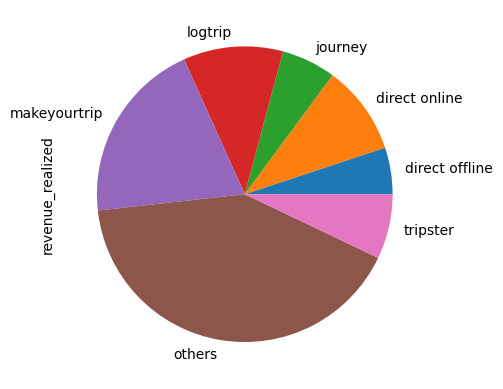

In [136]:
df_rev.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")